In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, ConfusionMatrixDisplay, precision_score, jaccard_score, make_scorer
import itertools
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree

# BDT com BBbar

In [8]:
dados = pd.read_csv("NovoBBar_Tagging.csv")
dados.describe()

,PtJet,nConstituent,Angularidade,SigmaKT,MaxRho,N_Vertices_S,FracLeadPt,Label
count,96326.000000,96326.000000,96326.000000,96326.000000,96326.000000,96326.000000,96326.000000,96326.000000
mean,7.347758,7.753099,0.215942,0.886480,0.082341,0.516070,0.389709,0.038920
std,3.933972,2.954425,0.048578,0.499730,0.209632,1.402362,0.145000,0.193405
min,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.092754,0.000000
25%,5.541882,6.000000,0.187058,0.583635,0.000000,0.000000,0.285988,0.000000
50%,6.340690,7.000000,0.215760,0.776788,0.000000,0.000000,0.362903,0.000000
75%,7.822388,9.000000,0.244357,1.048900,0.000000,0.000000,0.464421,0.000000
max,200.413000,38.000000,0.642087,17.032400,0.999967,19.000000,1.000000,1.000000


In [9]:

X = np.asarray(dados[["PtJet","nConstituent","SigmaKT","N_Vertices_S","FracLeadPt"]])
Y = np.asarray(dados[["Label"]])

In [10]:
label_counts = dados['Label'].value_counts()

print(f"Quantidade de rótulo 0: {label_counts[0]}")
print(f"Quantidade de rótulo 1: {label_counts[1]}")

Quantidade de rótulo 0: 92577
Quantidade de rótulo 1: 3749


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, stratify=Y, random_state=10)

print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
print()
unique, counts = np.unique(Y_test, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Quantidade de rótulo {u}: {c}")

Train set: (77060, 5) (77060, 1)
Test set: (19266, 5) (19266, 1)

Quantidade de rótulo 0: 18516
Quantidade de rótulo 1: 750


In [12]:
gbr = GradientBoostingClassifier(n_estimators= 800, learning_rate=0.1, subsample = 0.7, random_state=42) # produndidade, numero de arvores, quanto cada árvore contribui

In [13]:
gbr.fit(X_train, Y_train.ravel())

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,800
,subsample,0.7
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


Para os dados de treino
Eficiência = 0.23808

Pureza = 0.93578


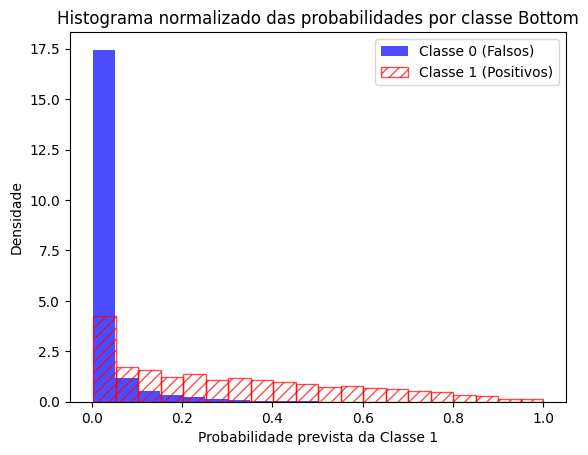

In [336]:
previsao = gbr.predict(X_train)
eficiencia = recall_score(Y_train,previsao,pos_label=1)
pureza = precision_score(Y_train, previsao, pos_label=1)
print ("Para os dados de treino")
print(f"Eficiência = {eficiencia:.5f}")
print ()
print(f"Pureza = {pureza:.5f}")

import matplotlib.pyplot as plt

# Probabilidades previstas da classe 1
y_proba = gbr.predict_proba(X_train)[:, 1]

# Plota histogramas normalizados
plt.hist(y_proba[Y_train.ravel() == 0], bins=20, alpha=0.7, color="blue", label="Classe 0 (Falsos)", density=True)

plt.hist(y_proba[Y_train.ravel() == 1], bins=20, alpha=0.7, label="Classe 1 (Positivos)", hatch="///", facecolor="none", edgecolor="red", density=True)

plt.xlabel("Probabilidade prevista da Classe 1")
plt.ylabel("Densidade")
plt.title("Histograma normalizado das probabilidades por classe Bottom")
plt.legend()
plt.show()

Para os dados de treino
Eficiência = 0.09067

Pureza = 0.40719


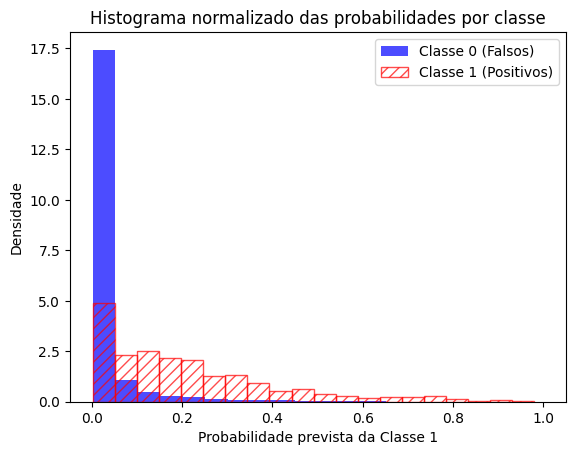

In [337]:
previsao = gbr.predict(X_test)
eficiencia = recall_score(Y_test,previsao,pos_label=1)
pureza = precision_score(Y_test, previsao, pos_label=1)
print ("Para os dados de treino")
print(f"Eficiência = {eficiencia:.5f}")
print ()
print(f"Pureza = {pureza:.5f}")

import matplotlib.pyplot as plt

# Probabilidades previstas da classe 1
y_proba = gbr.predict_proba(X_test)[:, 1]

# Plota histogramas normalizados 
plt.hist(y_proba[Y_test.ravel() == 0], bins=20, alpha=0.7, color="blue", label="Classe 0 (Falsos)", density=True)

plt.hist(y_proba[Y_test.ravel() == 1], bins=20, alpha=0.7, color="red", label="Classe 1 (Positivos)", hatch="///", facecolor="none", edgecolor="red", density=True)

plt.xlabel("Probabilidade prevista da Classe 1")
plt.ylabel("Densidade")
plt.title("Histograma normalizado das probabilidades por classe")
plt.legend()
plt.show()

In [338]:
from sklearn.metrics import confusion_matrix, classification_report

# probabilidade da classe positiva
Y_probas = gbr.predict_proba(X_test)[:, 1]

threshold = 0.6
previsao_custom = (Y_probas >= threshold).astype(int)
#FP/(FP + TN)

print("Threshold escolhido:", threshold)
print("Matriz de confusão:")
print(confusion_matrix(Y_test, previsao_custom))
print("\nRelatório de classificação:")
print(classification_report(Y_test, previsao_custom,digits=5))

Threshold escolhido: 0.6
Matriz de confusão:
[[18466    50]
 [  707    43]]

Relatório de classificação:
              precision    recall  f1-score   support

           0    0.96313   0.99730   0.97991     18516
           1    0.46237   0.05733   0.10202       750

    accuracy                        0.96071     19266
   macro avg    0.71275   0.52732   0.54097     19266
weighted avg    0.94363   0.96071   0.94574     19266



Threshold 0.00 -> Eficiência: 1.00000, Pureza: 0.03893
Threshold 0.02 -> Eficiência: 0.88000, Pureza: 0.11547
Threshold 0.04 -> Eficiência: 0.80400, Pureza: 0.16566
Threshold 0.06 -> Eficiência: 0.75200, Pureza: 0.19611
Threshold 0.07 -> Eficiência: 0.70667, Pureza: 0.22439
Threshold 0.09 -> Eficiência: 0.66800, Pureza: 0.24913
Threshold 0.11 -> Eficiência: 0.63067, Pureza: 0.26588
Threshold 0.13 -> Eficiência: 0.58800, Pureza: 0.28306
Threshold 0.15 -> Eficiência: 0.53600, Pureza: 0.28838
Threshold 0.17 -> Eficiência: 0.49600, Pureza: 0.29689
Threshold 0.18 -> Eficiência: 0.46000, Pureza: 0.30558
Threshold 0.20 -> Eficiência: 0.41067, Pureza: 0.30924
Threshold 0.22 -> Eficiência: 0.35867, Pureza: 0.30568
Threshold 0.24 -> Eficiência: 0.32800, Pureza: 0.31660
Threshold 0.26 -> Eficiência: 0.31067, Pureza: 0.33191
Threshold 0.28 -> Eficiência: 0.28133, Pureza: 0.33124
Threshold 0.29 -> Eficiência: 0.26267, Pureza: 0.34261
Threshold 0.31 -> Eficiência: 0.24533, Pureza: 0.35317
Threshold 

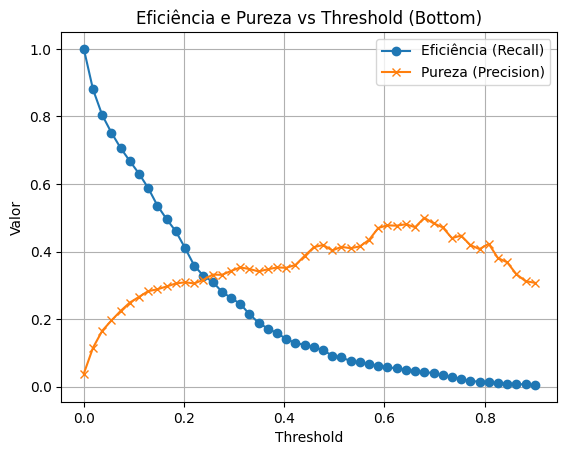

In [339]:
y_proba = gbr.predict_proba(X_test)[:, 1]

# Testando thresholds de 0 a 1
thresholds = np.linspace(0, 0.9, 50)  
eficiencia_list = []
pureza_list = []

for t in thresholds:
    y_pred_custom = (y_proba >= t).astype(int)  
    eficiencia_list.append(recall_score(Y_test, y_pred_custom, pos_label=1))
    pureza_list.append(precision_score(Y_test, y_pred_custom, pos_label=1))


for t, r, p in zip(thresholds, eficiencia_list, pureza_list):
    print(f"Threshold {t:.2f} -> Eficiência: {r:.5f}, Pureza: {p:.5f}")

# Plotar curvas
plt.plot(thresholds, eficiencia_list, label="Eficiência (Recall)", marker='o')
plt.plot(thresholds, pureza_list, label="Pureza (Precision)", marker='x')
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.title("Eficiência e Pureza vs Threshold (Bottom)")
plt.legend()
plt.grid(True)
plt.show()

Para os dados de treino


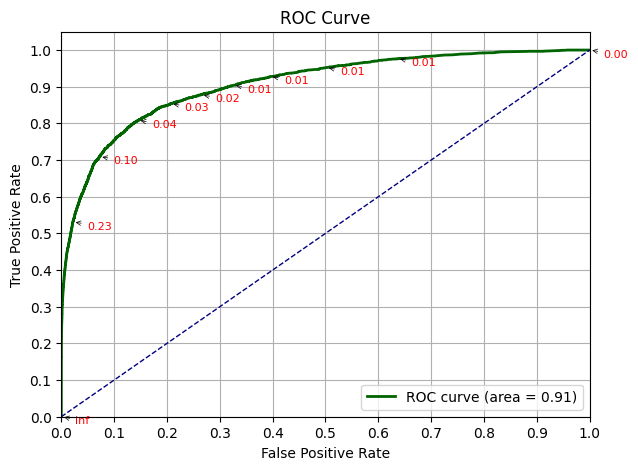

In [14]:
def plot_ROC(falsePositiveRate, truePositiveRate, areaUnderCurve):
    fig = plt.figure()
    fig.set_size_inches(15, 5)
    rocCurve = fig.add_subplot(1, 2, 1)

    # curva ROC
    rocCurve.plot(falsePositiveRate, truePositiveRate, color='darkgreen',
                  lw=2, label='ROC curve (area = %0.2f)' % areaUnderCurve)
    
    # linha aleatória
    rocCurve.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    
    # grade, limites e ticks
    rocCurve.grid()
    plt.xlim([0.0, 1.0])
    rocCurve.set_xticks(np.arange(0, 1.1, 0.1))
    plt.ylim([0.0, 1.05])
    rocCurve.set_yticks(np.arange(0, 1.05, 0.1))
    
    # rótulos
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    rocCurve.legend(loc="lower right")
    
    for i in range(0, len(thresholds), max(1, len(thresholds)//10)):
        plt.annotate(f"{thresholds[i]:.2f}",
                     (fpr[i], tpr[i]),
                     textcoords="offset points", xytext=(10, -5),
                     fontsize=8, color="red",
                     arrowprops=dict(arrowstyle="->", lw=0.5))
    
    return plt
print("Para os dados de treino")
Y_probas = gbr.predict_proba(X_train)    
# calcular fpr, tpr e auc
fpr, tpr, thresholds = metrics.roc_curve(Y_train, Y_probas[:, 1])
auc = metrics.auc(fpr, tpr)

# chamar a função e mostrar o gráfico
plot_ROC(fpr, tpr, auc)
plt.show()

Confusion matrix, without normalization
[[  229  2770]
 [   60 74001]]


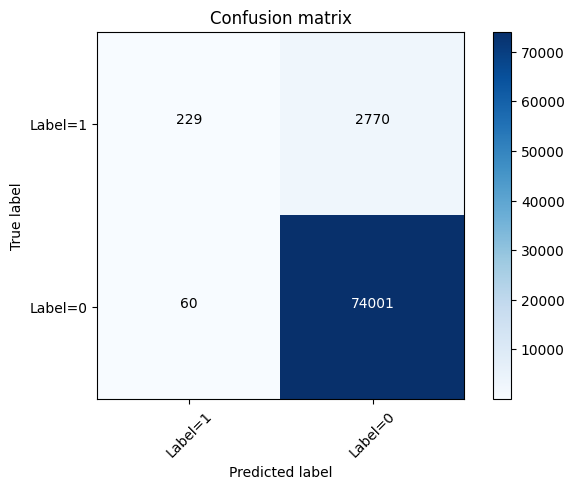

In [329]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

previsao = gbr.predict(X_train)

cnf_matrix = confusion_matrix(Y_train, previsao, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Label=1','Label=0'],normalize= False,  title='Confusion matrix')

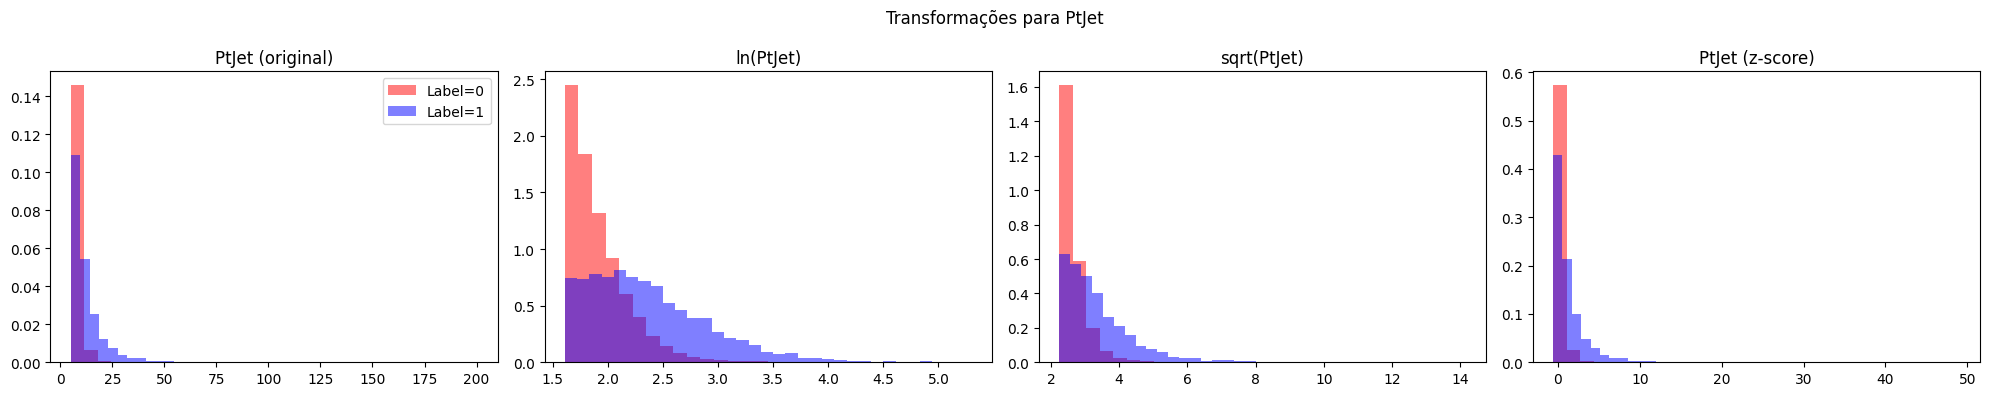

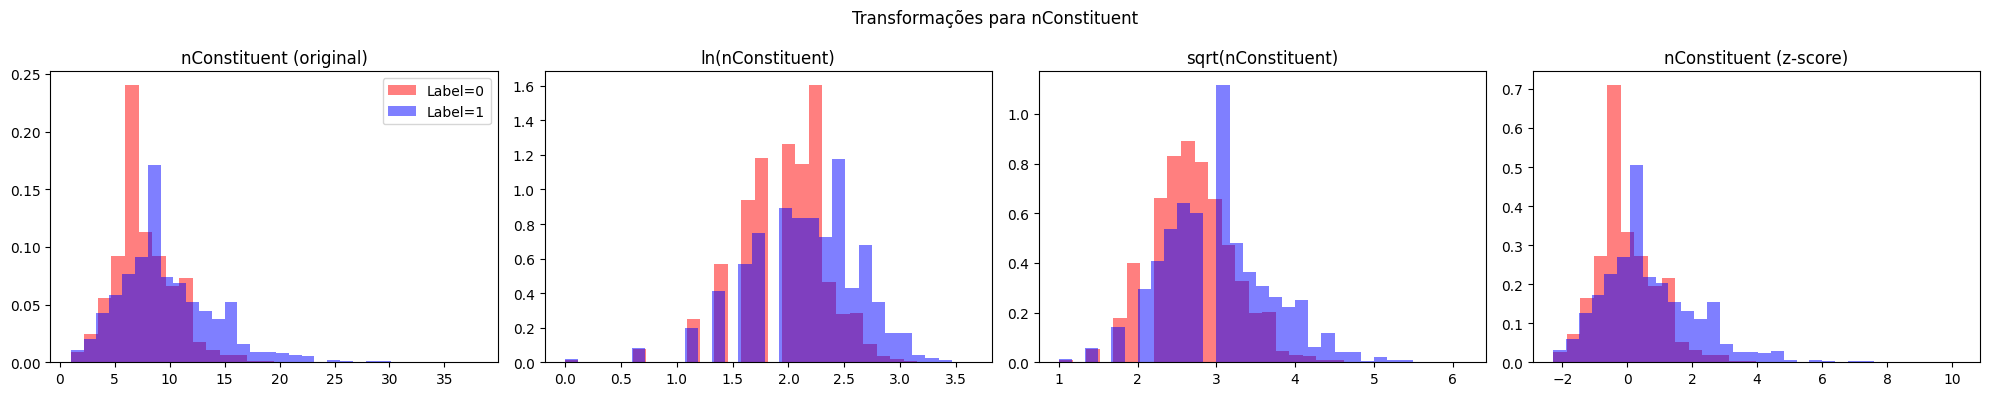

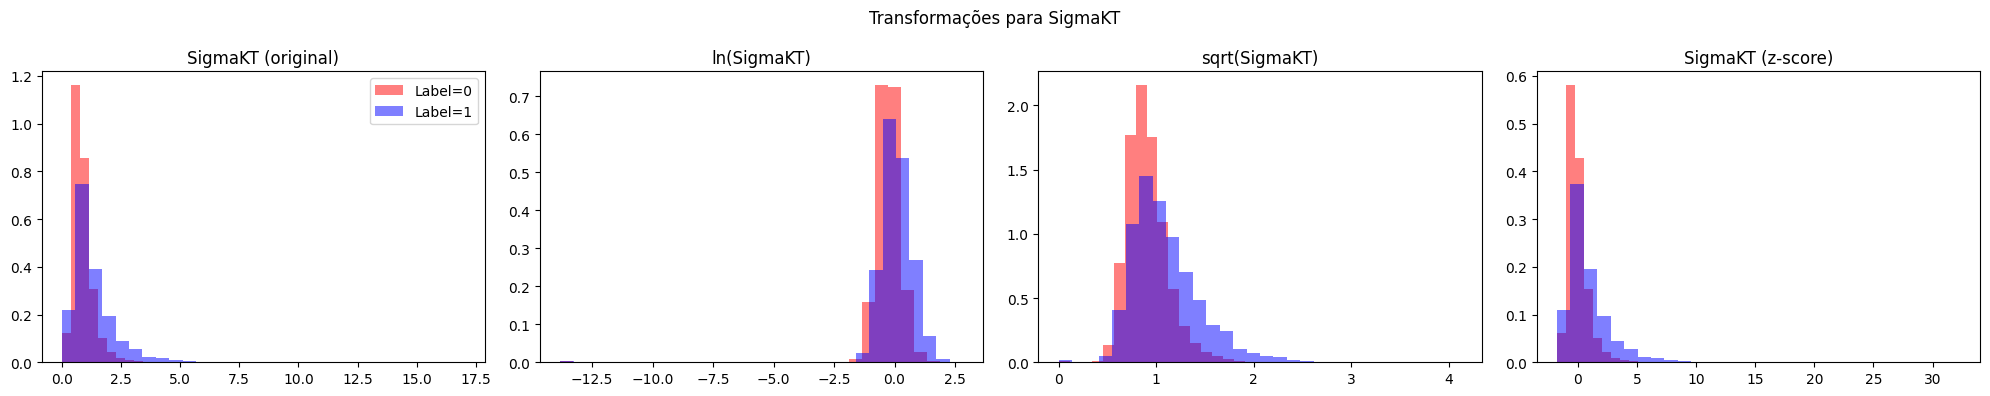

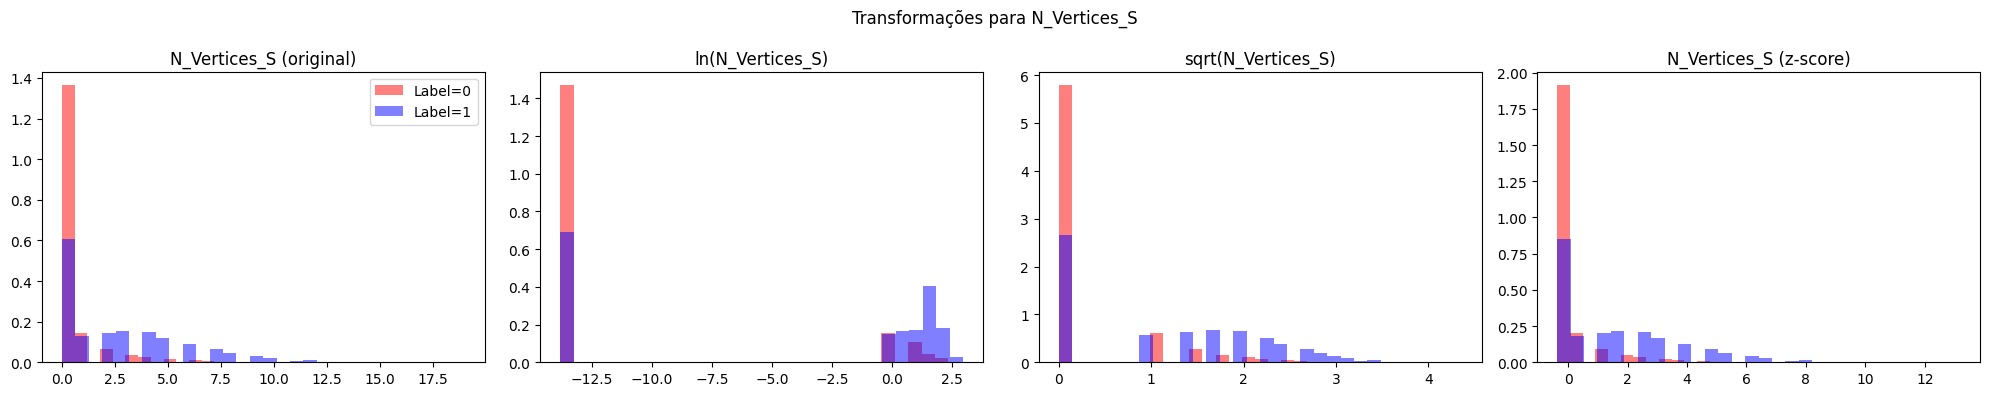

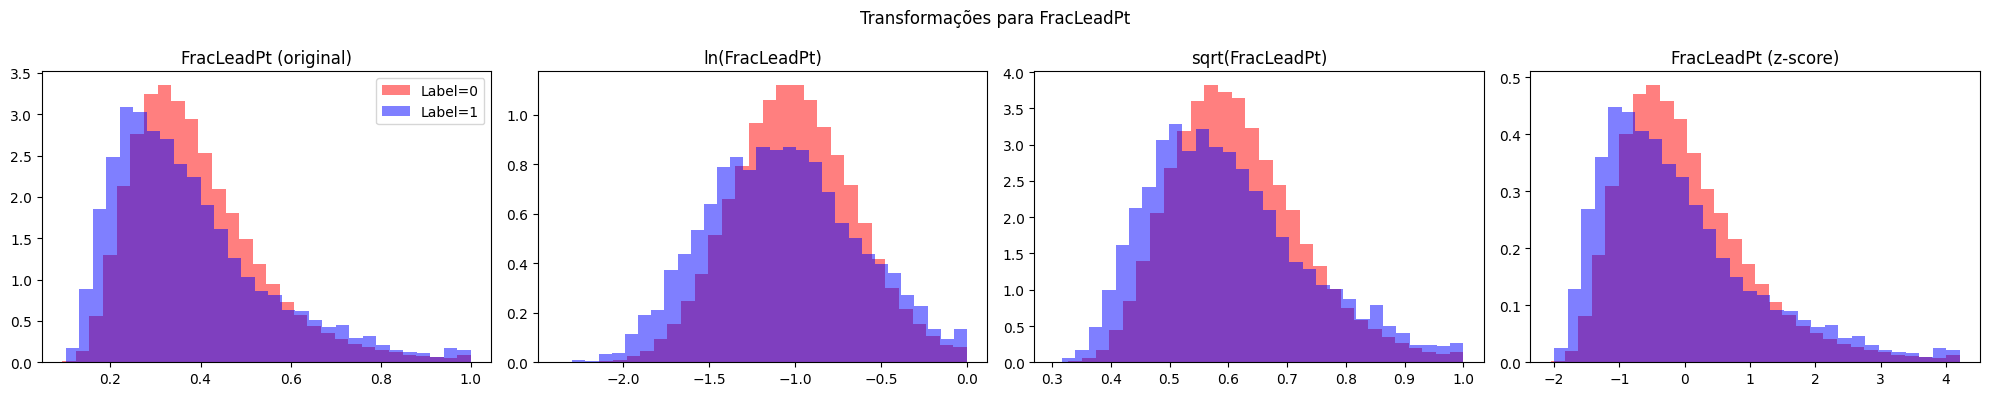

In [23]:
dados_label0 = dados[dados["Label"] == 0]
dados_label1 = dados[dados["Label"] == 1]

variaveis = ["PtJet","nConstituent","SigmaKT","N_Vertices_S","FracLeadPt"]

scaler = StandardScaler()

for var in variaveis:
    fig, axs = plt.subplots(1, 4, figsize=(20, 4))
    
    # Original
    axs[0].hist(dados_label0[var], bins=30, density=True, alpha=0.5, color="red", label="Label=0")
    axs[0].hist(dados_label1[var], bins=30, density=True, alpha=0.5, color="blue", label="Label=1")
    axs[0].set_title(f"{var} (original)")
    axs[0].legend()


    axs[1].hist(np.log(dados_label0[var] + 1e-6), bins=30, density=True, alpha=0.5, color="red")
    axs[1].hist(np.log(dados_label1[var] + 1e-6), bins=30, density=True, alpha=0.5, color="blue")
    axs[1].set_title(f"ln({var})")


    axs[2].hist(np.sqrt(dados_label0[var].clip(lower=0)), bins=30, density=True, alpha=0.5, color="red")
    axs[2].hist(np.sqrt(dados_label1[var].clip(lower=0)), bins=30, density=True, alpha=0.5, color="blue")
    axs[2].set_title(f"sqrt({var})")


    all_values = np.concatenate([dados_label0[var], dados_label1[var]]).reshape(-1, 1)
    scaled = scaler.fit_transform(all_values).flatten()
    scaled0 = scaled[:len(dados_label0)]
    scaled1 = scaled[len(dados_label0):]
    axs[3].hist(scaled0, bins=30, density=True, alpha=0.5, color="red")
    axs[3].hist(scaled1, bins=30, density=True, alpha=0.5, color="blue")
    axs[3].set_title(f"{var} (z-score)")

    plt.suptitle(f"Transformações para {var}")
    plt.tight_layout()
    plt.show()

## Determinacao dos mehlores parametros bbbar

In [465]:
gbr = GradientBoostingClassifier(
    n_estimators=1000,         # máximo de árvores
    learning_rate=0.05,
    max_leaf_nodes=5,
    validation_fraction=0.5,   
    n_iter_no_change=200,       
    tol=1e-12,                  
    random_state=42
)

# Treina com early stopping
gbr.fit(X_train, Y_train.ravel())

print("Número efetivo de estimadores usados:", gbr.n_estimators_)

Número efetivo de estimadores usados: 472


In [139]:
gbc = GradientBoostingClassifier(random_state=42)

pureza = make_scorer(precision_score, pos_label=1, zero_division=0)

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)  # ajuste n_splits conforme positivos

param_grid = {
    'n_estimators': [1, 5, 10, 50, 100],
    'learning_rate': [0.05, 0.1, 0.5],
    'max_leaf_nodes':[2, 4, 5, 10]
}

gs = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,
    scoring=pureza,
    cv=cv,
    n_jobs=-1
)

gs.fit(X_train, Y_train.ravel())

print("Melhores parâmetros:", gs.best_params_)
print()
print("Melhor pureza (precision classe 1):", gs.best_score_)

Melhores parâmetros: {'learning_rate': 0.05, 'max_leaf_nodes': 4, 'n_estimators': 100}

Melhor pureza (precision classe 1): 0.47852742624338207


# BDT para CCBar


In [2]:
dados1 = pd.read_csv("NovoCCBar_Tagging.csv")
dados1.describe()

,PtJet,nConstituent,Angularidade,SigmaKT,MaxRho,N_Vertices_S,FracLeadPt,Label
count,6163.000000,6163.000000,6163.000000,6163.000000,6163.000000,6163.000000,6163.000000,6163.000000
mean,7.502225,7.471361,0.211170,0.926331,0.088503,0.717183,0.397537,0.104332
std,3.703576,3.172773,0.050360,0.529239,0.196804,1.407430,0.145242,0.305716
min,5.000120,1.000000,0.000000,0.000000,0.000000,0.000000,0.046082,0.000000
25%,5.523180,5.000000,0.180700,0.597447,0.000000,0.000000,0.293138,0.000000
50%,6.367360,7.000000,0.211342,0.809138,0.000000,0.000000,0.372581,0.000000
75%,8.042880,9.000000,0.240918,1.102330,0.044943,1.000000,0.472340,0.000000
max,73.100900,55.000000,0.513596,7.656620,0.998577,9.000000,1.000000,1.000000


In [3]:
X = np.asarray(dados1[["PtJet","nConstituent","SigmaKT","N_Vertices_S","FracLeadPt"]])
Y = np.asarray(dados1[["Label"]])

In [4]:
label_counts = dados1['Label'].value_counts()

print(f"Quantidade de rótulo 0: {label_counts[0]}")
print(f"Quantidade de rótulo 1: {label_counts[1]}")
print ()
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, stratify=Y, random_state=1)

print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
print()
unique, counts = np.unique(Y_test, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Quantidade de rótulo {u}: {c}")

Quantidade de rótulo 0: 5520
Quantidade de rótulo 1: 643

Train set: (4930, 5) (4930, 1)
Test set: (1233, 5) (1233, 1)

Quantidade de rótulo 0: 1104
Quantidade de rótulo 1: 129


In [5]:
gbr = GradientBoostingClassifier(max_leaf_nodes = 4 ,n_estimators= 800, learning_rate=0.05, random_state=10) # produndidade, numero de arvores, quanto cada árvore contribui

In [6]:
gbr.fit(X_train, Y_train.ravel())

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,800
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


Para os dados de treino
Eficiência = 0.34436

Pureza = 0.94149


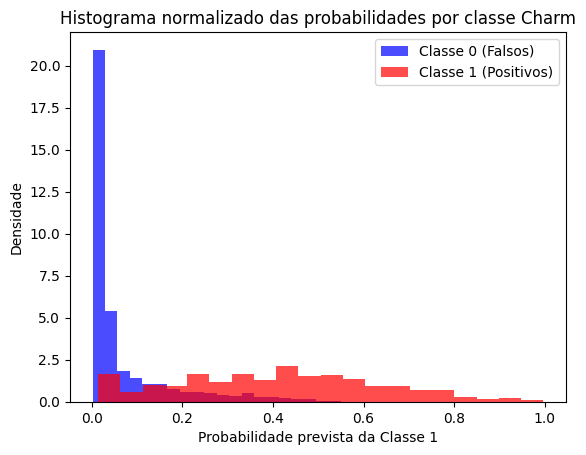

In [379]:
previsao = gbr.predict(X_train)
eficiencia = recall_score(Y_train,previsao,pos_label=1)
pureza = precision_score(Y_train, previsao, pos_label=1)
print ("Para os dados de treino")
print(f"Eficiência = {eficiencia:.5f}") 
print ()
print(f"Pureza = {pureza:.5f}")

import matplotlib.pyplot as plt

# Probabilidades previstas da classe 1
y_proba = gbr.predict_proba(X_train)[:, 1]

# Plota histogramas normalizados 
plt.hist(y_proba[Y_train.ravel() == 0], bins=20, alpha=0.7, color="blue", label="Classe 0 (Falsos)", density=True)

plt.hist(y_proba[Y_train.ravel() == 1], bins=20, alpha=0.7, color="red", label="Classe 1 (Positivos)", density=True)

plt.xlabel("Probabilidade prevista da Classe 1")
plt.ylabel("Densidade")
plt.title("Histograma normalizado das probabilidades por classe Charm")
plt.legend()
plt.show()

Para os dados de test
Eficiência = 0.12403

Pureza = 0.59259



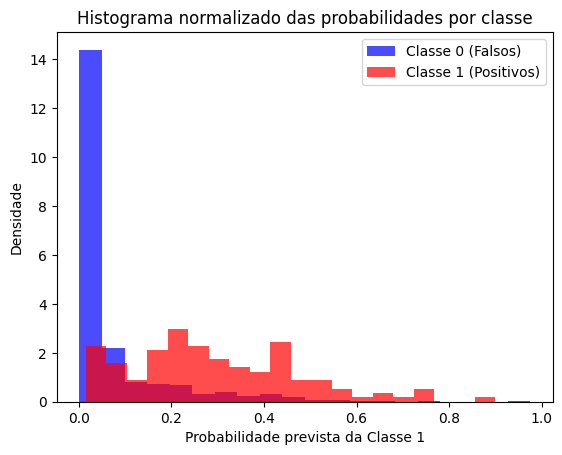

In [380]:
previsao = gbr.predict(X_test)
eficiencia = recall_score(Y_test,previsao,pos_label=1)
pureza = precision_score(Y_test, previsao, pos_label=1)
print ("Para os dados de test")
print(f"Eficiência = {eficiencia:.5f}") 
print ()
print(f"Pureza = {pureza:.5f}")
print ()


y_proba = gbr.predict_proba(X_test)[:, 1]
nome = True

# Plota histogramas normalizados 
plt.hist(y_proba[Y_test.ravel() == 0], bins=20, alpha=0.7, color="blue", label="Classe 0 (Falsos)", density=nome)

plt.hist(y_proba[Y_test.ravel() == 1], bins=20, alpha=0.7, color="red", label="Classe 1 (Positivos)", density=nome)

plt.xlabel("Probabilidade prevista da Classe 1")
plt.ylabel("Densidade")
plt.title("Histograma normalizado das probabilidades por classe")
plt.legend()
plt.show()

Threshold 0.00 -> Eficiência: 1.00000, Pureza: 0.10462
Threshold 0.02 -> Eficiência: 0.96124, Pureza: 0.15067
Threshold 0.04 -> Eficiência: 0.93798, Pureza: 0.24008
Threshold 0.06 -> Eficiência: 0.91473, Pureza: 0.27570
Threshold 0.07 -> Eficiência: 0.89147, Pureza: 0.31165
Threshold 0.09 -> Eficiência: 0.84496, Pureza: 0.33030
Threshold 0.11 -> Eficiência: 0.82171, Pureza: 0.34754
Threshold 0.13 -> Eficiência: 0.79845, Pureza: 0.35764
Threshold 0.15 -> Eficiência: 0.79070, Pureza: 0.37778
Threshold 0.17 -> Eficiência: 0.72868, Pureza: 0.38367
Threshold 0.18 -> Eficiência: 0.69767, Pureza: 0.40179
Threshold 0.20 -> Eficiência: 0.65891, Pureza: 0.40865
Threshold 0.22 -> Eficiência: 0.62016, Pureza: 0.42328
Threshold 0.24 -> Eficiência: 0.55814, Pureza: 0.44172
Threshold 0.26 -> Eficiência: 0.51938, Pureza: 0.43506
Threshold 0.28 -> Eficiência: 0.47287, Pureza: 0.42958
Threshold 0.29 -> Eficiência: 0.43411, Pureza: 0.43077
Threshold 0.31 -> Eficiência: 0.40310, Pureza: 0.44444
Threshold 

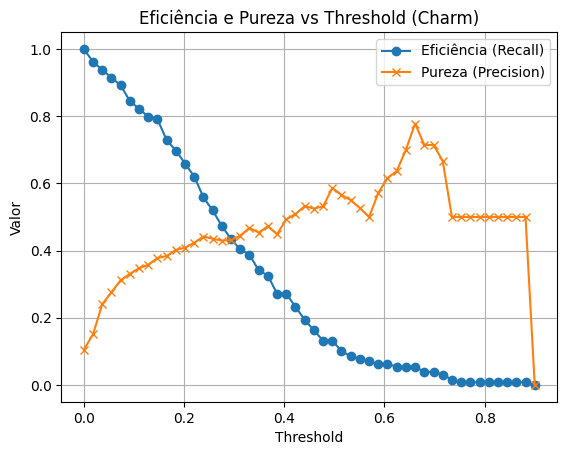

In [381]:
y_proba = gbr.predict_proba(X_test)[:, 1]

# Testando thresholds de 0 a 1
thresholds = np.linspace(0, 0.9, 50)  
eficiencia_list = []
pureza_list = []

for t in thresholds:
    y_pred_custom = (y_proba >= t).astype(int)  
    eficiencia_list.append(recall_score(Y_test, y_pred_custom, pos_label=1))
    pureza_list.append(precision_score(Y_test, y_pred_custom, pos_label=1))


for t, r, p in zip(thresholds, eficiencia_list, pureza_list):
    print(f"Threshold {t:.2f} -> Eficiência: {r:.5f}, Pureza: {p:.5f}")

# Plotar curvas
plt.plot(thresholds, eficiencia_list, label="Eficiência (Recall)", marker='o')
plt.plot(thresholds, pureza_list, label="Pureza (Precision)", marker='x')
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.title("Eficiência e Pureza vs Threshold (Charm)")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

# probabilidade da classe positiva
Y_probas = gbr.predict_proba(X_test)[:, 1]

threshold = 0.5
previsao_custom = (Y_probas >= threshold).astype(int)
#FP/(FP + TN)
# avaliar
print("Threshold escolhido:", threshold)
print("Matriz de confusão:")
print(confusion_matrix(Y_test, previsao_custom))
print("\nRelatório de classificação:")
print(classification_report(Y_test, previsao_custom,digits=5))

Threshold escolhido: 0.5
Matriz de confusão:
[[1093   11]
 [ 113   16]]

Relatório de classificação:
              precision    recall  f1-score   support

           0    0.90630   0.99004   0.94632      1104
           1    0.59259   0.12403   0.20513       129

    accuracy                        0.89943      1233
   macro avg    0.74945   0.55703   0.57572      1233
weighted avg    0.87348   0.89943   0.86877      1233



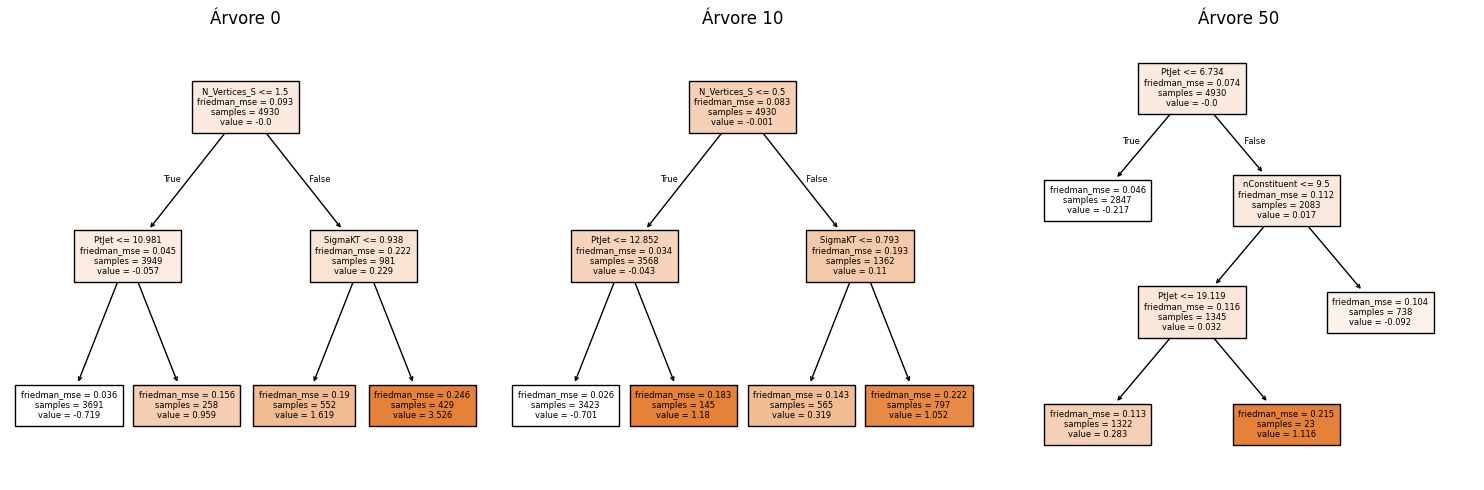

In [329]:
n_arvores_para_plotar = [0, 10, 50] 

fig, axes = plt.subplots(1, len(n_arvores_para_plotar), figsize=(15, 5))

for i, idx in enumerate(n_arvores_para_plotar):
    
    arvore = gbr.estimators_[idx, 0]
    plot_tree(arvore, filled=True, feature_names=["PtJet","nConstituent","SigmaKT","N_Vertices_S","FracLeadPt"],
              class_names=["Fundo","Charm"], ax=axes[i], fontsize=6)
    axes[i].set_title(f"Árvore {idx}")

plt.tight_layout()
plt.show()


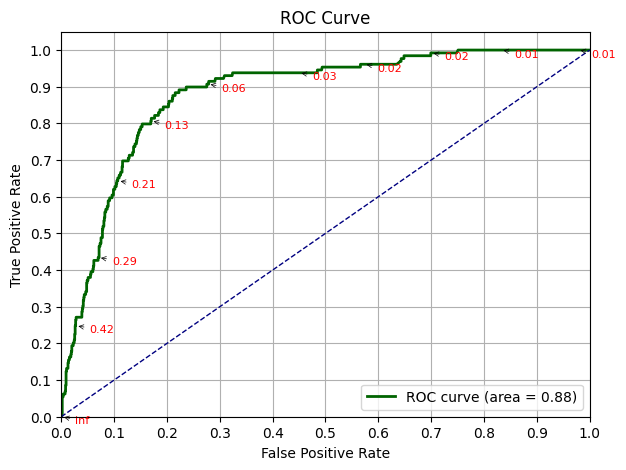

In [97]:
Y_probas = gbr.predict_proba(X_test)
def plot_ROC(falsePositiveRate, truePositiveRate, areaUnderCurve):
    fig = plt.figure()
    fig.set_size_inches(15, 5)
    rocCurve = fig.add_subplot(1, 2, 1)

    # curva ROC
    rocCurve.plot(falsePositiveRate, truePositiveRate, color='darkgreen',lw=2, label='ROC curve (area = %0.2f)' % areaUnderCurve)
    
    # linha aleatória
    rocCurve.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    
    # grade, limites e ticks
    rocCurve.grid()
    plt.xlim([0.0, 1.0])
    rocCurve.set_xticks(np.arange(0, 1.1, 0.1))
    plt.ylim([0.0, 1.05])
    rocCurve.set_yticks(np.arange(0, 1.05, 0.1))
    
    # rótulos
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    rocCurve.legend(loc="lower right")
    
    for i in range(0, len(thresholds), max(1, len(thresholds)//10)):
        plt.annotate(f"{thresholds[i]:.2f}",(fpr[i], tpr[i]),textcoords="offset points", xytext=(10, -5),fontsize=8, color="red",arrowprops=dict(arrowstyle="->", lw=0.5))
    
    return plt
    
# calcular fpr, tpr e auc
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_probas[:, 1])
auc = metrics.auc(fpr, tpr)

# chamar a função e mostrar o gráfico
plot_ROC(fpr, tpr, auc)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


dados_label0 = dados1[dados1["Label"] == 0]
dados_label1 = dados1[dados1["Label"] == 1]


variaveis = ["PtJet","nConstituent","SigmaKT","N_Vertices_S","FracLeadPt"]


scaler = StandardScaler()

for var in variaveis:
    fig, axs = plt.subplots(1, 4, figsize=(20, 4))
    
   
    axs[0].hist(dados_label0[var], bins=30, density=True, alpha=0.5, color="red", label="Label=0")
    axs[0].hist(dados_label1[var], bins=30, density=True, alpha=0.5, color="blue", label="Label=1")
    axs[0].set_title(f"{var} (original)")
    axs[0].legend()

 
    axs[1].hist(np.log(dados_label0[var] + 1e-6), bins=30, density=True, alpha=0.5, color="red")
    axs[1].hist(np.log(dados_label1[var] + 1e-6), bins=30, density=True, alpha=0.5, color="blue")
    axs[1].set_title(f"ln({var})")


    axs[2].hist(np.sqrt(dados_label0[var].clip(lower=0)), bins=30, density=True, alpha=0.5, color="red")
    axs[2].hist(np.sqrt(dados_label1[var].clip(lower=0)), bins=30, density=True, alpha=0.5, color="blue")
    axs[2].set_title(f"sqrt({var})")

   
    all_values = np.concatenate([dados_label0[var], dados_label1[var]]).reshape(-1, 1)
    scaled = scaler.fit_transform(all_values).flatten()
    scaled0 = scaled[:len(dados_label0)]
    scaled1 = scaled[len(dados_label0):]
    axs[3].hist(scaled0, bins=30, density=True, alpha=0.5, color="red")
    axs[3].hist(scaled1, bins=30, density=True, alpha=0.5, color="blue")
    axs[3].set_title(f"{var} (z-score)")

    plt.suptitle(f"Transformações para {var}")
    plt.tight_layout()
    plt.show()

## Determinacao dos mehlores parametros ccbar

In [240]:
gbc = GradientBoostingClassifier(random_state=42)

pureza = make_scorer(precision_score, pos_label=1, zero_division=0)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  

param_grid = {
    'n_estimators': [5, 10, 50, 100, 500],
    'learning_rate': [0.05, 0.1, 0.3, 0.5, 0.01],
    'max_leaf_nodes':[2, 4, 5, 10]
    
}

gs = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,
    scoring=pureza,
    cv=cv,
    n_jobs=-1
)

gs.fit(X_train, Y_train.ravel())

print("Melhores parâmetros:", gs.best_params_)
print("Melhor pureza (precision classe 1):", gs.best_score_)


Melhores parâmetros: {'learning_rate': 0.3, 'max_leaf_nodes': 2, 'n_estimators': 5}
Melhor pureza (precision classe 1): 0.4794117647058824


In [7]:
gbr = GradientBoostingClassifier(
    n_estimators=1000,        
    learning_rate=0.5,
    max_leaf_nodes=3,
    validation_fraction=0.4,   
    n_iter_no_change=100,       
    tol=1e-12,                  
    random_state=42
)

# Treina com early stopping
gbr.fit(X_train, Y_train.ravel())

print("Número efetivo de estimadores usados:", gbr.n_estimators_)


Número efetivo de estimadores usados: 102


# BTD com CCBBbar

In [3]:
dados2 = pd.read_csv("pesadosBar_Tagging.csv")
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102169 entries, 0 to 102168
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   PtJet         102169 non-null  float64
 1   nConstituent  102169 non-null  int64  
 2   Angularidade  102169 non-null  float64
 3   SigmaKT       102169 non-null  float64
 4   MaxRho        102169 non-null  float64
 5   N_Vertices_S  102169 non-null  int64  
 6   FracLeadPt    102169 non-null  float64
 7   Label         102169 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 6.2 MB


In [4]:
X2 = np.asarray(dados2[["PtJet","nConstituent","SigmaKT","N_Vertices_S","FracLeadPt"]])
Y2 = np.asarray(dados2[["Label"]])

In [5]:
label_counts = dados2['Label'].value_counts()

print(f"Quantidade de rótulo 0: {label_counts[0]}")
print(f"Quantidade de rótulo 1: {label_counts[1]}")

Quantidade de rótulo 0: 97720
Quantidade de rótulo 1: 4449


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split( X2, Y2, test_size=0.2, random_state=42)

print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
print()
unique, counts = np.unique(Y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Quantidade de rótulo {u}: {c}")

Train set: (81735, 5) (81735, 1)
Test set: (20434, 5) (20434, 1)

Quantidade de rótulo 0: 78186
Quantidade de rótulo 1: 3549


In [7]:
gbr = GradientBoostingClassifier(n_estimators= 100, learning_rate=0.1,random_state=42 ) 
gbr.fit(X_train, Y_train.ravel())

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


Para os dados de treino
Eficiência = 0.06340

Pureza = 0.70533


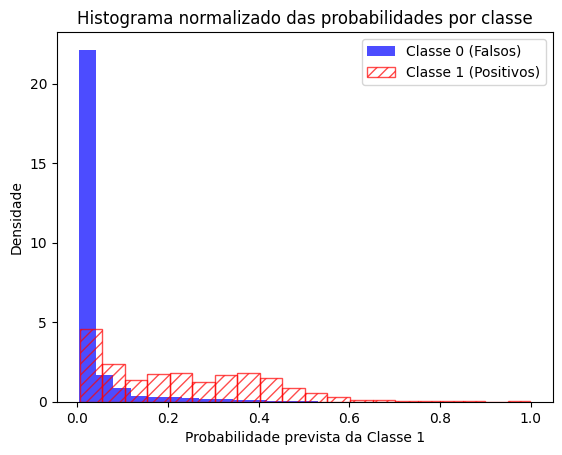

In [8]:
 
previsao = gbr.predict(X_train)
eficiencia = recall_score(Y_train,previsao,pos_label=1)
pureza = precision_score(Y_train, previsao, pos_label=1)
print ("Para os dados de treino")
print(f"Eficiência = {eficiencia:.5f}")
print ()
print(f"Pureza = {pureza:.5f}")

import matplotlib.pyplot as plt

# Probabilidades previstas da classe 1
y_proba = gbr.predict_proba(X_train)[:, 1]

# Plota histogramas normalizados 
plt.hist(y_proba[Y_train.ravel() == 0], bins=20, alpha=0.7, color="blue", label="Classe 0 (Falsos)", density=True)

plt.hist(y_proba[Y_train.ravel() == 1], bins=20, alpha=0.7, label="Classe 1 (Positivos)", hatch="///", facecolor="none", edgecolor="red", density=True)

plt.xlabel("Probabilidade prevista da Classe 1")
plt.ylabel("Densidade")
plt.title("Histograma normalizado das probabilidades por classe")
plt.legend()
plt.show()

Para os dados de treino
Eficiência = 0.03333

Pureza = 0.44776


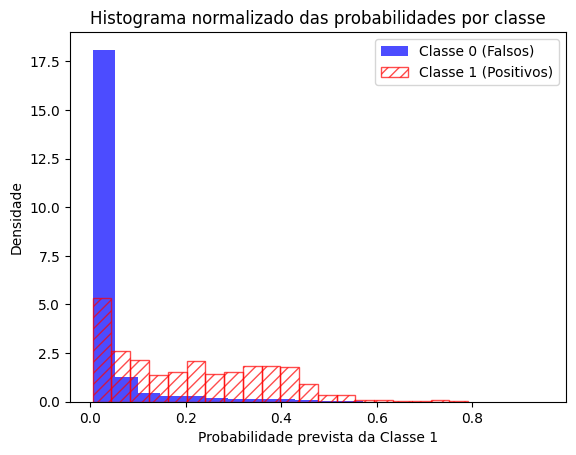

In [9]:

previsao = gbr.predict(X_test)
eficiencia = recall_score(Y_test,previsao,pos_label=1)
pureza = precision_score(Y_test, previsao, pos_label=1)
print ("Para os dados de treino")
print(f"Eficiência = {eficiencia:.5f}")
print ()
print(f"Pureza = {pureza:.5f}")

import matplotlib.pyplot as plt

# Probabilidades previstas da classe 1
y_proba = gbr.predict_proba(X_test)[:, 1]
nome = True
# Plota histogramas normalizados 
plt.hist(y_proba[Y_test.ravel() == 0], bins=20, alpha=0.7, color="blue", label="Classe 0 (Falsos)", density=nome)

plt.hist(y_proba[Y_test.ravel() == 1], bins=20, alpha=0.7, label="Classe 1 (Positivos)", hatch="///", facecolor="none", edgecolor="red", density=nome)

plt.xlabel("Probabilidade prevista da Classe 1")
plt.ylabel("Densidade")
plt.title("Histograma normalizado das probabilidades por classe")
plt.legend()
plt.show()

In [348]:
from sklearn.metrics import confusion_matrix, classification_report

# probabilidade da classe positiva
Y_probas = gbr.predict_proba(X_test)[:, 1]

# escolher threshold
threshold = 0.7
previsao_custom = (Y_probas >= threshold).astype(int)
#FP/(FP + TN)
# avaliar
print("Threshold escolhido:", threshold)
print("Matriz de confusão:")
print(confusion_matrix(Y_test, previsao_custom))
print("\nRelatório de classificação:")
print(classification_report(Y_test, previsao_custom,digits=5))

Threshold escolhido: 0.7
Matriz de confusão:
[[19531     3]
 [  895     5]]

Relatório de classificação:
              precision    recall  f1-score   support

           0    0.95618   0.99985   0.97753     19534
           1    0.62500   0.00556   0.01101       900

    accuracy                        0.95605     20434
   macro avg    0.79059   0.50270   0.49427     20434
weighted avg    0.94160   0.95605   0.93496     20434



Threshold 0.00 -> Eficiência: 1.00000, Pureza: 0.04404
Threshold 0.02 -> Eficiência: 0.90333, Pureza: 0.11045
Threshold 0.04 -> Eficiência: 0.80556, Pureza: 0.16806
Threshold 0.06 -> Eficiência: 0.75889, Pureza: 0.19757
Threshold 0.07 -> Eficiência: 0.71000, Pureza: 0.22350
Threshold 0.09 -> Eficiência: 0.66111, Pureza: 0.24506
Threshold 0.11 -> Eficiência: 0.62222, Pureza: 0.26193
Threshold 0.13 -> Eficiência: 0.60111, Pureza: 0.27296
Threshold 0.15 -> Eficiência: 0.57111, Pureza: 0.28699
Threshold 0.17 -> Eficiência: 0.54889, Pureza: 0.29670
Threshold 0.18 -> Eficiência: 0.52556, Pureza: 0.31201
Threshold 0.20 -> Eficiência: 0.49111, Pureza: 0.31960
Threshold 0.22 -> Eficiência: 0.45889, Pureza: 0.32700
Threshold 0.24 -> Eficiência: 0.41333, Pureza: 0.34381
Threshold 0.26 -> Eficiência: 0.37778, Pureza: 0.34765
Threshold 0.28 -> Eficiência: 0.36000, Pureza: 0.36120
Threshold 0.29 -> Eficiência: 0.33333, Pureza: 0.37175
Threshold 0.31 -> Eficiência: 0.30222, Pureza: 0.37621
Threshold 

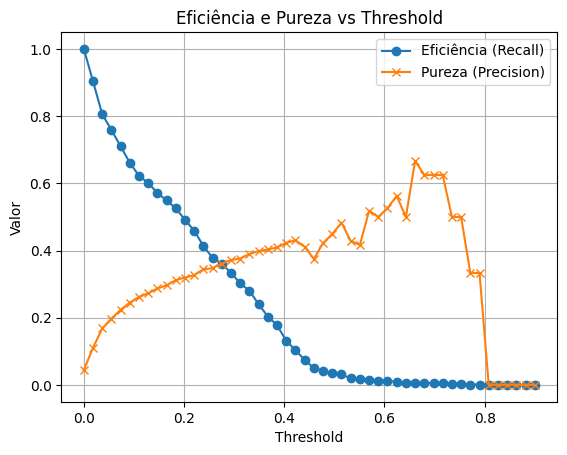

In [349]:
y_proba = gbr.predict_proba(X_test)[:, 1]

# Testando thresholds de 0 a 1
thresholds = np.linspace(0, 0.9, 50)  
eficiencia_list = []
pureza_list = []

for t in thresholds:
    y_pred_custom = (y_proba >= t).astype(int)  
    eficiencia_list.append(recall_score(Y_test, y_pred_custom, pos_label=1))
    pureza_list.append(precision_score(Y_test, y_pred_custom, pos_label=1))


for t, r, p in zip(thresholds, eficiencia_list, pureza_list):
    print(f"Threshold {t:.2f} -> Eficiência: {r:.5f}, Pureza: {p:.5f}")

# Plotar curvas
plt.plot(thresholds, eficiencia_list, label="Eficiência (Recall)", marker='o')
plt.plot(thresholds, pureza_list, label="Pureza (Precision)", marker='x')
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.title("Eficiência e Pureza vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

Confusion matrix, without normalization
[[ 1029  6143]
 [  351 86145]]


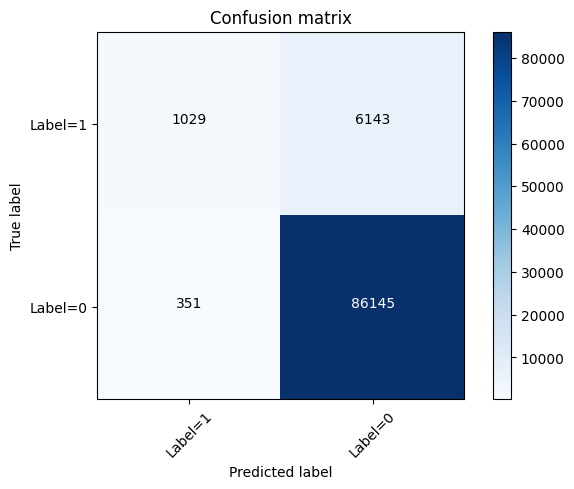

In [119]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

previsao = gbr.predict(X_train)

cnf_matrix = confusion_matrix(Y_train, previsao, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Label=1','Label=0'],normalize= False,  title='Confusion matrix')

Para os dados de treino
Eficiência = 0.06082

Pureza = 0.64957


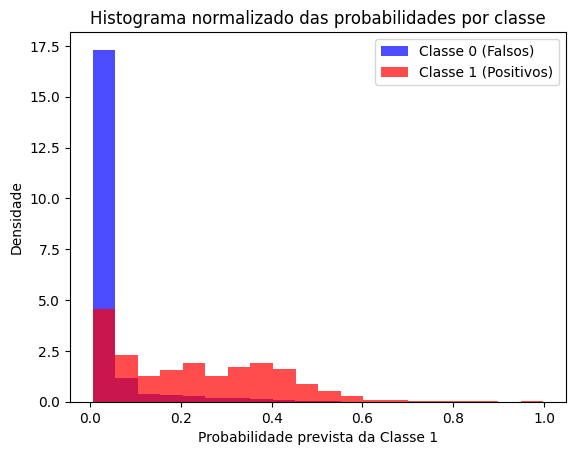

In [12]:
dados = pd.read_csv("BBBar_Tagging.csv")


# dados["ln_SigmaKT"] = np.log(dados["SigmaKT"] + 1e-6) 
X = np.asarray(dados[["PtJet","nConstituent","SigmaKT","N_Vertices_S","FracLeadPt"]])
Y = np.asarray(dados[["Label"]])

Maquina = gbr

previsao = Maquina.predict(X)
eficiencia = recall_score(Y,previsao,pos_label=1)
pureza = precision_score(Y, previsao, pos_label=1)
print ("Para os dados de treino")
print(f"Eficiência = {eficiencia:.5f}")
print ()
print(f"Pureza = {pureza:.5f}")

import matplotlib.pyplot as plt


y_proba = Maquina.predict_proba(X)[:, 1]

plt.hist(y_proba[Y.ravel() == 0], bins=20, alpha=0.7, color="blue", label="Classe 0 (Falsos)", density=True)

plt.hist(y_proba[Y.ravel() == 1], bins=20, alpha=0.7, color="red", label="Classe 1 (Positivos)", density=True)

plt.xlabel("Probabilidade prevista da Classe 1")
plt.ylabel("Densidade")
plt.title("Histograma normalizado das probabilidades por classe")
plt.legend()
plt.show()


Threshold 0.00 -> Eficiência: 1.00000, Pureza: 0.10433
Threshold 0.02 -> Eficiência: 0.90513, Pureza: 0.22637
Threshold 0.04 -> Eficiência: 0.81337, Pureza: 0.29104
Threshold 0.06 -> Eficiência: 0.76205, Pureza: 0.31818
Threshold 0.07 -> Eficiência: 0.71384, Pureza: 0.34589
Threshold 0.09 -> Eficiência: 0.66563, Pureza: 0.37088
Threshold 0.11 -> Eficiência: 0.59720, Pureza: 0.38438
Threshold 0.13 -> Eficiência: 0.56765, Pureza: 0.39717
Threshold 0.15 -> Eficiência: 0.52722, Pureza: 0.41141
Threshold 0.17 -> Eficiência: 0.48989, Pureza: 0.41777
Threshold 0.18 -> Eficiência: 0.44790, Pureza: 0.42541
Threshold 0.20 -> Eficiência: 0.40747, Pureza: 0.43163
Threshold 0.22 -> Eficiência: 0.37325, Pureza: 0.44610
Threshold 0.24 -> Eficiência: 0.33904, Pureza: 0.46482
Threshold 0.26 -> Eficiência: 0.32037, Pureza: 0.47685
Threshold 0.28 -> Eficiência: 0.29860, Pureza: 0.48000
Threshold 0.29 -> Eficiência: 0.27061, Pureza: 0.48876
Threshold 0.31 -> Eficiência: 0.23484, Pureza: 0.47335
Threshold 

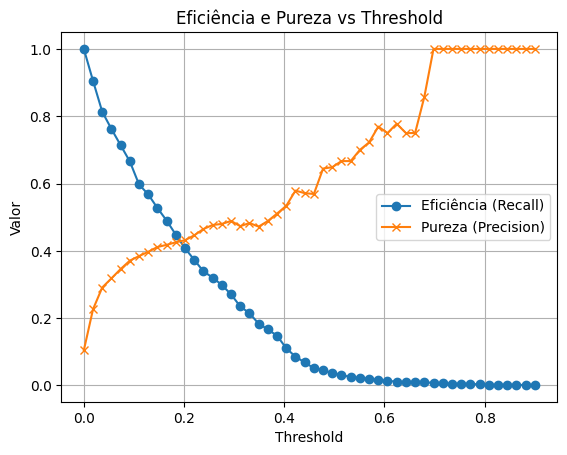

In [11]:
y_proba = Maquina.predict_proba(X)[:, 1]

# Testando thresholds de 0 a 1
thresholds = np.linspace(0, 0.9, 50)  
eficiencia_list = []
pureza_list = []

for t in thresholds:
    y_pred_custom = (y_proba >= t).astype(int)  
    eficiencia_list.append(recall_score(Y, y_pred_custom, pos_label=1))
    pureza_list.append(precision_score(Y, y_pred_custom, pos_label=1))


for t, r, p in zip(thresholds, eficiencia_list, pureza_list):
    print(f"Threshold {t:.2f} -> Eficiência: {r:.5f}, Pureza: {p:.5f}")

# Plotar curvas
plt.plot(thresholds, eficiencia_list, label="Eficiência (Recall)", marker='o')
plt.plot(thresholds, pureza_list, label="Pureza (Precision)", marker='x')
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.title("Eficiência e Pureza vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [42]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

## Para C

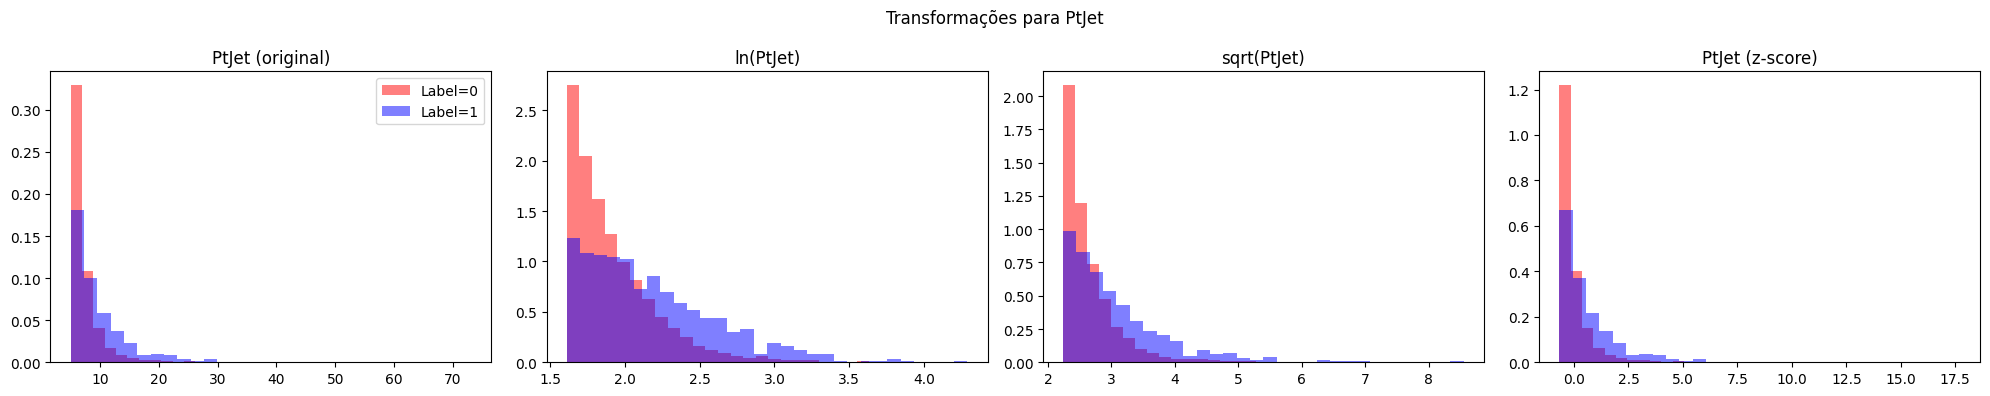

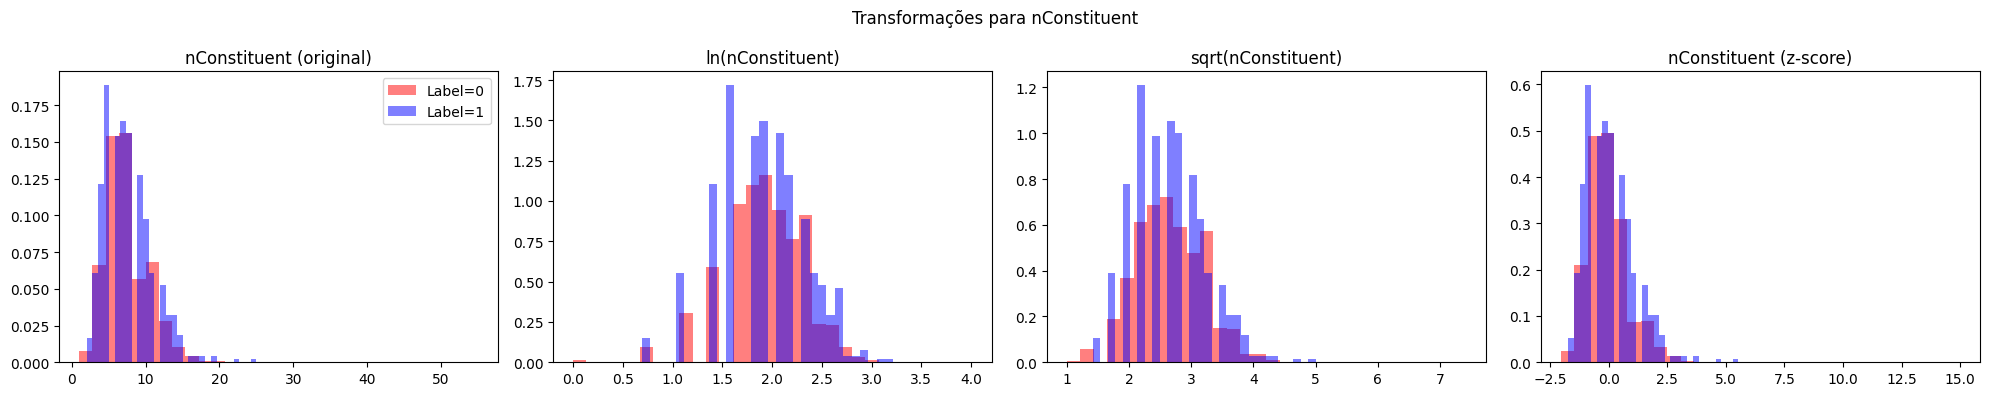

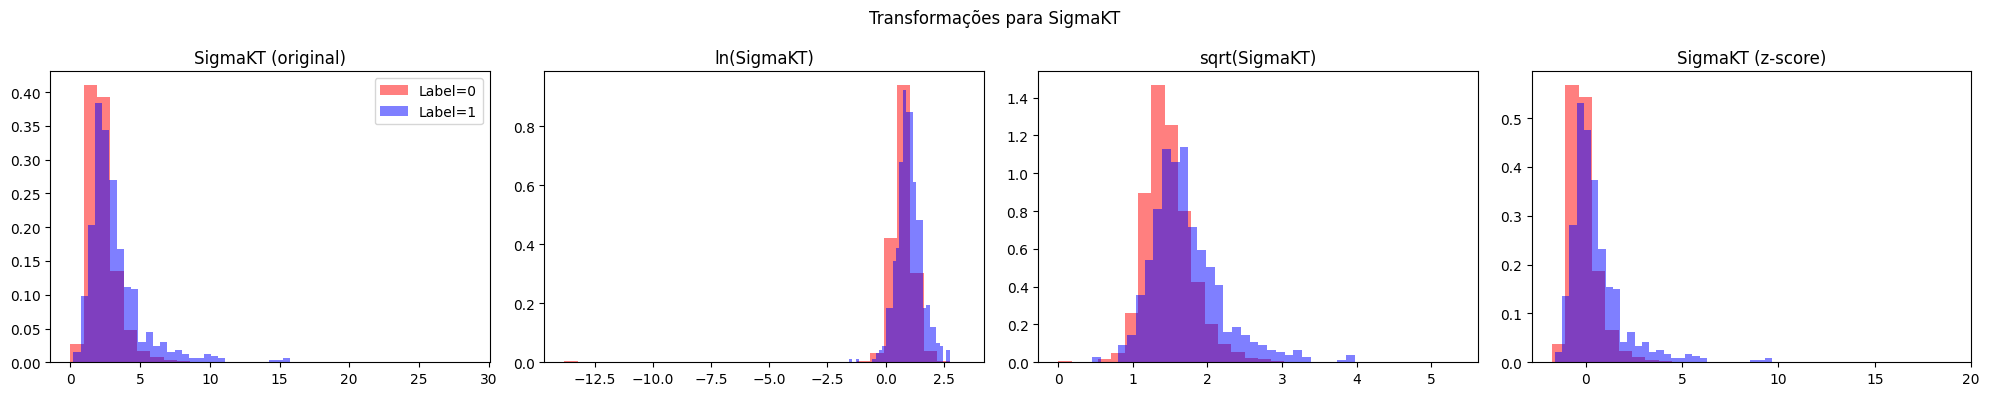

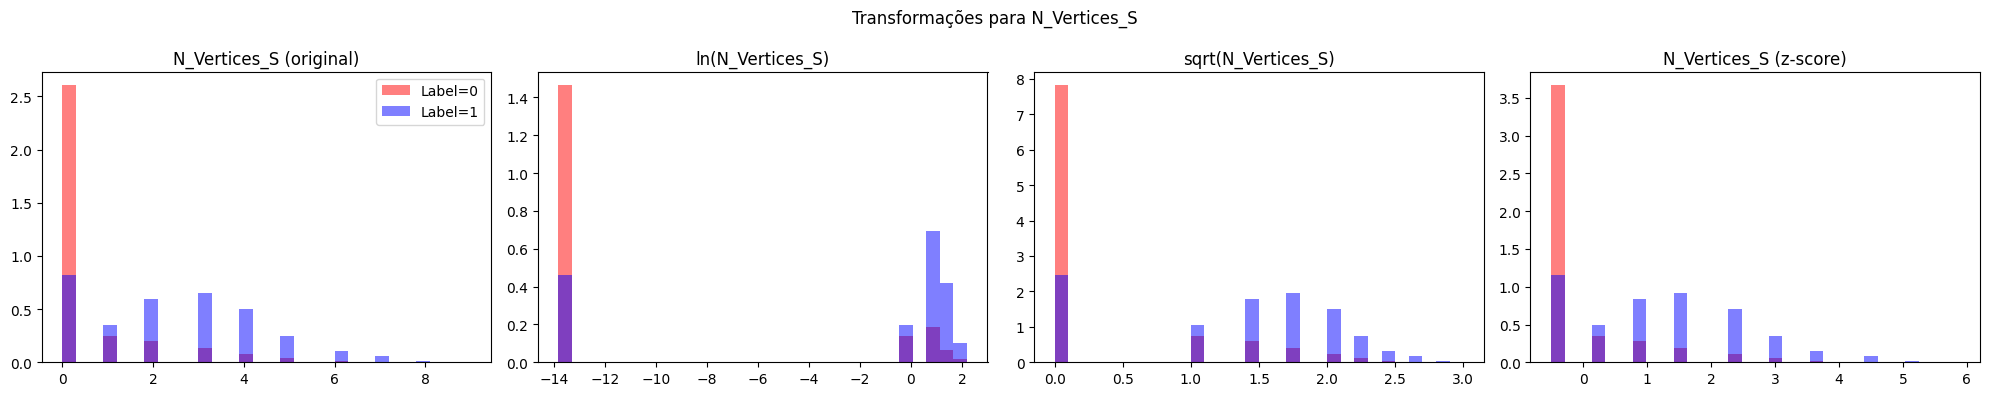

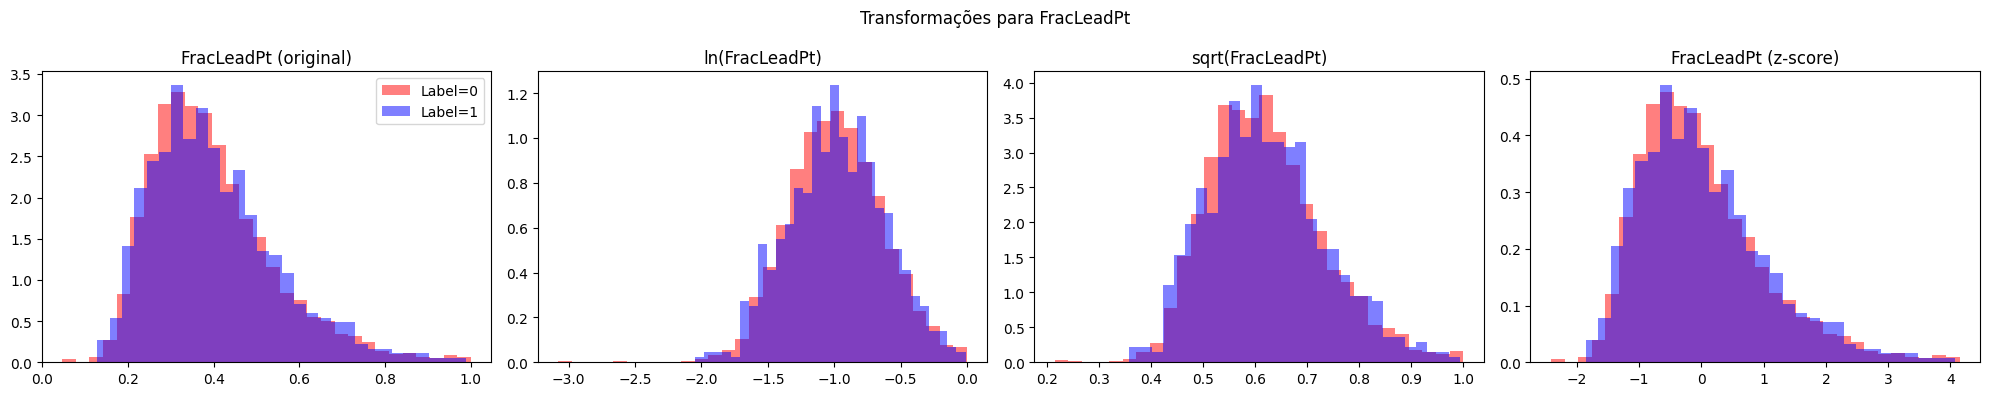

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Separa por label
dados_label0 = dados[dados["Label"] == 0]
dados_label1 = dados[dados["Label"] == 1]


variaveis = ["PtJet","nConstituent","SigmaKT","N_Vertices_S","FracLeadPt"]


scaler = StandardScaler()

for var in variaveis:
    fig, axs = plt.subplots(1, 4, figsize=(20, 4))
    
    # Original
    axs[0].hist(dados_label0[var], bins=30, density=True, alpha=0.5, color="red", label="Label=0")
    axs[0].hist(dados_label1[var], bins=30, density=True, alpha=0.5, color="blue", label="Label=1")
    axs[0].set_title(f"{var} (original)")
    axs[0].legend()

    
    axs[1].hist(np.log(dados_label0[var] + 1e-6), bins=30, density=True, alpha=0.5, color="red")
    axs[1].hist(np.log(dados_label1[var] + 1e-6), bins=30, density=True, alpha=0.5, color="blue")
    axs[1].set_title(f"ln({var})")


    axs[2].hist(np.sqrt(dados_label0[var].clip(lower=0)), bins=30, density=True, alpha=0.5, color="red")
    axs[2].hist(np.sqrt(dados_label1[var].clip(lower=0)), bins=30, density=True, alpha=0.5, color="blue")
    axs[2].set_title(f"sqrt({var})")

    all_values = np.concatenate([dados_label0[var], dados_label1[var]]).reshape(-1, 1)
    scaled = scaler.fit_transform(all_values).flatten()
    scaled0 = scaled[:len(dados_label0)]
    scaled1 = scaled[len(dados_label0):]
    axs[3].hist(scaled0, bins=30, density=True, alpha=0.5, color="red")
    axs[3].hist(scaled1, bins=30, density=True, alpha=0.5, color="blue")
    axs[3].set_title(f"{var} (z-score)")

    plt.suptitle(f"Transformações para {var}")
    plt.tight_layout()
    plt.show()


In [114]:
dados = pd.read_csv("CCBar_Tagging.csv")

X = np.asarray(dados[["PtJet","nConstituent","N_Vertices_S"]])
Y = np.asarray(dados[["Label"]])


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.05,
    random_state=2,
    stratify=Y
)

# Modelo XGBoost
model = xgb.XGBClassifier(
     n_estimators=800,      
    learning_rate=0.1,        
    random_state=42,
    n_jobs=-1
)

# Treinar
model.fit(X_train, Y_train.ravel())

# Predições
Y_pred = model.predict(X_test)
Y_prob = model.predict_proba(X_test)[:, 1]

# Métricas
print(classification_report(Y_test, Y_pred))
print("ROC AUC:", roc_auc_score(Y_test, Y_prob))


              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2822
           1       0.32      0.10      0.16       339

    accuracy                           0.88      3161
   macro avg       0.61      0.54      0.55      3161
weighted avg       0.84      0.88      0.85      3161

ROC AUC: 0.8546664534243168


/home/vinicius/Ambientes/Heavy_Jets_Machine/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vinicius/Ambientes/Heavy_Jets_Machine/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Threshold 0.00 -> Eficiência: 1.00000, Pureza: 0.10724
Threshold 0.02 -> Eficiência: 0.95280, Pureza: 0.16030
Threshold 0.04 -> Eficiência: 0.91740, Pureza: 0.22198
Threshold 0.06 -> Eficiência: 0.89381, Pureza: 0.25942
Threshold 0.07 -> Eficiência: 0.87611, Pureza: 0.28503
Threshold 0.09 -> Eficiência: 0.85546, Pureza: 0.30366
Threshold 0.11 -> Eficiência: 0.83186, Pureza: 0.31973
Threshold 0.13 -> Eficiência: 0.81416, Pureza: 0.32896
Threshold 0.15 -> Eficiência: 0.80236, Pureza: 0.33958
Threshold 0.17 -> Eficiência: 0.78171, Pureza: 0.34777
Threshold 0.18 -> Eficiência: 0.74926, Pureza: 0.35524
Threshold 0.20 -> Eficiência: 0.72271, Pureza: 0.36296
Threshold 0.22 -> Eficiência: 0.70501, Pureza: 0.37112
Threshold 0.24 -> Eficiência: 0.67257, Pureza: 0.37438
Threshold 0.26 -> Eficiência: 0.64307, Pureza: 0.38179
Threshold 0.28 -> Eficiência: 0.59882, Pureza: 0.38520
Threshold 0.29 -> Eficiência: 0.56637, Pureza: 0.39588
Threshold 0.31 -> Eficiência: 0.53392, Pureza: 0.41136
Threshold 

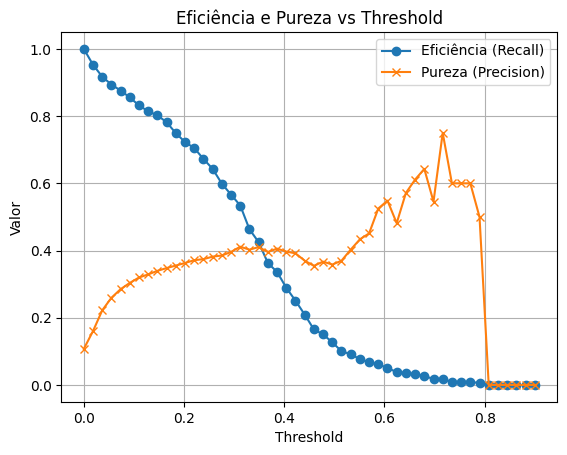

In [115]:
y_proba = model.predict_proba(X_test)[:, 1]


thresholds = np.linspace(0, 0.9, 50)  
eficiencia_list = []
pureza_list = []

for t in thresholds:
    y_pred_custom = (y_proba >= t).astype(int)  
    eficiencia_list.append(recall_score(Y_test, y_pred_custom, pos_label=1))
    pureza_list.append(precision_score(Y_test, y_pred_custom, pos_label=1))


for t, r, p in zip(thresholds, eficiencia_list, pureza_list):
    print(f"Threshold {t:.2f} -> Eficiência: {r:.5f}, Pureza: {p:.5f}")

# Plotar curvas
plt.plot(thresholds, eficiencia_list, label="Eficiência (Recall)", marker='o')
plt.plot(thresholds, pureza_list, label="Pureza (Precision)", marker='x')
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.title("Eficiência e Pureza vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

Threshold 0.00 -> Eficiência: 1.00000, Pureza: 0.10440
Threshold 0.02 -> Eficiência: 1.00000, Pureza: 0.24914
Threshold 0.04 -> Eficiência: 0.99827, Pureza: 0.31260
Threshold 0.06 -> Eficiência: 0.99827, Pureza: 0.35968
Threshold 0.07 -> Eficiência: 0.99309, Pureza: 0.40464
Threshold 0.09 -> Eficiência: 0.98964, Pureza: 0.44077
Threshold 0.11 -> Eficiência: 0.97237, Pureza: 0.48202
Threshold 0.13 -> Eficiência: 0.96028, Pureza: 0.52109
Threshold 0.15 -> Eficiência: 0.94301, Pureza: 0.56000
Threshold 0.17 -> Eficiência: 0.93782, Pureza: 0.59215
Threshold 0.18 -> Eficiência: 0.93264, Pureza: 0.62212
Threshold 0.20 -> Eficiência: 0.92573, Pureza: 0.66091
Threshold 0.22 -> Eficiência: 0.91537, Pureza: 0.69100
Threshold 0.24 -> Eficiência: 0.90328, Pureza: 0.72438
Threshold 0.26 -> Eficiência: 0.89119, Pureza: 0.75771
Threshold 0.28 -> Eficiência: 0.88256, Pureza: 0.78015
Threshold 0.29 -> Eficiência: 0.87047, Pureza: 0.80511
Threshold 0.31 -> Eficiência: 0.85838, Pureza: 0.82696
Threshold 

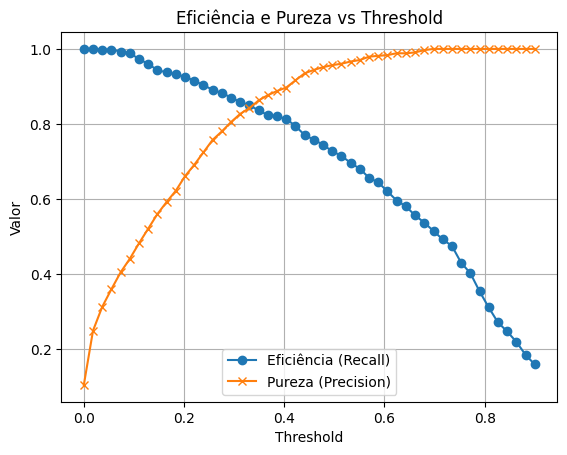

In [90]:
y_proba = model.predict_proba(X_train)[:, 1]

# Testando thresholds de 0 a 1
thresholds = np.linspace(0, 0.9, 50)  
eficiencia_list = []
pureza_list = []

for t in thresholds:
    y_pred_custom = (y_proba >= t).astype(int)  
    eficiencia_list.append(recall_score(Y_train, y_pred_custom, pos_label=1))
    pureza_list.append(precision_score(Y_train, y_pred_custom, pos_label=1))


for t, r, p in zip(thresholds, eficiencia_list, pureza_list):
    print(f"Threshold {t:.2f} -> Eficiência: {r:.5f}, Pureza: {p:.5f}")

# Plotar curvas
plt.plot(thresholds, eficiencia_list, label="Eficiência (Recall)", marker='o')
plt.plot(thresholds, pureza_list, label="Pureza (Precision)", marker='x')
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.title("Eficiência e Pureza vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

## Para B

In [97]:
dados = pd.read_csv("BBBar_Tagging.csv")

X = np.asarray(dados[["PtJet","nConstituent","N_Vertices_S"]])
Y = np.asarray(dados[["Label"]])

# Divisão treino/teste (com estratificação)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=1,
    stratify=Y
)

# Modelo XGBoost
model = xgb.XGBClassifier(
     n_estimators=800,      # número de árvores
    learning_rate=0.1,    # passo de aprendizado
    subsample=0.8,         # fração de amostras por árvore 
    random_state=42,
    n_jobs=-1
)

# Treinar
model.fit(X_train, Y_train.ravel())

# Predições
Y_pred = model.predict(X_test)
Y_prob = model.predict_proba(X_test)[:, 1]

# Métricas
print(classification_report(Y_test, Y_pred))
print("ROC AUC:", roc_auc_score(Y_test, Y_prob))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18516
           1       0.36      0.11      0.16       750

    accuracy                           0.96     19266
   macro avg       0.66      0.55      0.57     19266
weighted avg       0.94      0.96      0.95     19266

ROC AUC: 0.861429178368258


Threshold 0.00 -> Eficiência: 1.00000, Pureza: 0.03893
Threshold 0.02 -> Eficiência: 0.83200, Pureza: 0.10634
Threshold 0.04 -> Eficiência: 0.75200, Pureza: 0.14830
Threshold 0.06 -> Eficiência: 0.69067, Pureza: 0.18388
Threshold 0.07 -> Eficiência: 0.65200, Pureza: 0.20738
Threshold 0.09 -> Eficiência: 0.59733, Pureza: 0.22178
Threshold 0.11 -> Eficiência: 0.55733, Pureza: 0.23378
Threshold 0.13 -> Eficiência: 0.50800, Pureza: 0.24565
Threshold 0.15 -> Eficiência: 0.47333, Pureza: 0.25558
Threshold 0.17 -> Eficiência: 0.44000, Pureza: 0.26485
Threshold 0.18 -> Eficiência: 0.41067, Pureza: 0.27329
Threshold 0.20 -> Eficiência: 0.38800, Pureza: 0.28307
Threshold 0.22 -> Eficiência: 0.37333, Pureza: 0.29381
Threshold 0.24 -> Eficiência: 0.34933, Pureza: 0.29909
Threshold 0.26 -> Eficiência: 0.32533, Pureza: 0.30462
Threshold 0.28 -> Eficiência: 0.28533, Pureza: 0.29681
Threshold 0.29 -> Eficiência: 0.26933, Pureza: 0.30560
Threshold 0.31 -> Eficiência: 0.24933, Pureza: 0.30656
Threshold 

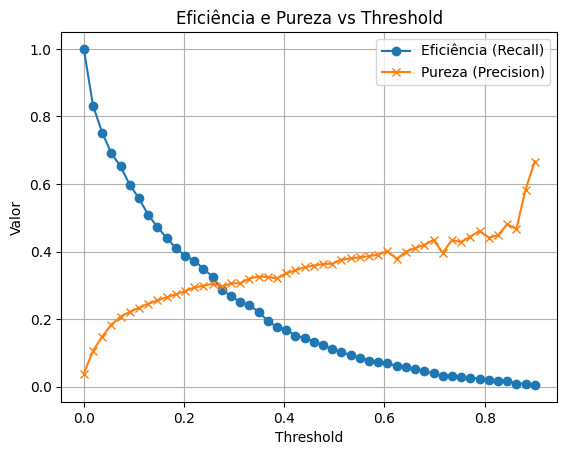

In [98]:
y_proba = model.predict_proba(X_test)[:, 1]

# Testando thresholds de 0 a 1
thresholds = np.linspace(0, 0.9, 50)  
eficiencia_list = []
pureza_list = []

for t in thresholds:
    y_pred_custom = (y_proba >= t).astype(int)  
    eficiencia_list.append(recall_score(Y_test, y_pred_custom, pos_label=1))
    pureza_list.append(precision_score(Y_test, y_pred_custom, pos_label=1))


for t, r, p in zip(thresholds, eficiencia_list, pureza_list):
    print(f"Threshold {t:.2f} -> Eficiência: {r:.5f}, Pureza: {p:.5f}")

# Plotar curvas
plt.plot(thresholds, eficiencia_list, label="Eficiência (Recall)", marker='o')
plt.plot(thresholds, pureza_list, label="Pureza (Precision)", marker='x')
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.title("Eficiência e Pureza vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [262]:
# import xgboost as xgb
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

dados = pd.read_csv("CCBar_Tagging.csv")
dados = dados[dados["PtJet"] > 6]

X = np.asarray(dados[["PtJet","nConstituent","SigmaKT","N_Vertices_S","FracLeadPt"]])
Y = np.asarray(dados[["Label"]])


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.1,
    random_state=1,
    stratify=Y
)

# Modelo XGBoost
model = xgb.XGBClassifier(
     n_estimators=800,      # número de árvores
    learning_rate=0.05,    # passo de aprendizado
    max_depth=10,           # profundidade das árvores
    subsample=0.05,         # fração de amostras por árvore 
    random_state=42,
    n_jobs=-1
)

# Treinar
model.fit(X_train, Y_train.ravel())

# Predições
Y_pred = model.predict(X_test)
Y_prob = model.predict_proba(X_test)[:, 1]

# Métricas
print(classification_report(Y_test, Y_pred))
print("ROC AUC:", roc_auc_score(Y_test, Y_prob))


              precision    recall  f1-score   support

           0       0.94      0.97      0.95     21622
           1       0.34      0.19      0.25      1796

    accuracy                           0.91     23418
   macro avg       0.64      0.58      0.60     23418
weighted avg       0.89      0.91      0.90     23418

ROC AUC: 0.81600210150554


Threshold 0.00 -> Eficiência: 1.00000, Pureza: 0.07669
Threshold 0.02 -> Eficiência: 0.82572, Pureza: 0.16918
Threshold 0.04 -> Eficiência: 0.73998, Pureza: 0.20512
Threshold 0.06 -> Eficiência: 0.68820, Pureza: 0.22940
Threshold 0.07 -> Eficiência: 0.64922, Pureza: 0.24846
Threshold 0.09 -> Eficiência: 0.61080, Pureza: 0.26269
Threshold 0.11 -> Eficiência: 0.57684, Pureza: 0.27473
Threshold 0.13 -> Eficiência: 0.55011, Pureza: 0.28538
Threshold 0.15 -> Eficiência: 0.51726, Pureza: 0.29131
Threshold 0.17 -> Eficiência: 0.48608, Pureza: 0.29755
Threshold 0.18 -> Eficiência: 0.46269, Pureza: 0.30518
Threshold 0.20 -> Eficiência: 0.44321, Pureza: 0.31167
Threshold 0.22 -> Eficiência: 0.41871, Pureza: 0.31242
Threshold 0.24 -> Eficiência: 0.39978, Pureza: 0.31588
Threshold 0.26 -> Eficiência: 0.38085, Pureza: 0.31963
Threshold 0.28 -> Eficiência: 0.36581, Pureza: 0.32573
Threshold 0.29 -> Eficiência: 0.34911, Pureza: 0.32896
Threshold 0.31 -> Eficiência: 0.32851, Pureza: 0.32814
Threshold 

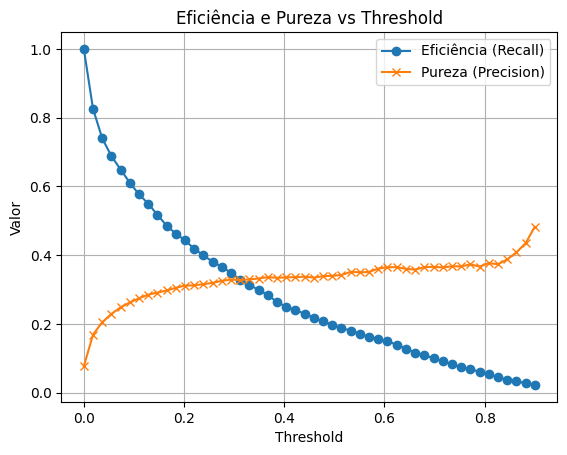

In [263]:
y_proba = model.predict_proba(X_test)[:, 1]

# Testando thresholds de 0 a 1
thresholds = np.linspace(0, 0.9, 50)  
eficiencia_list = []
pureza_list = []

for t in thresholds:
    y_pred_custom = (y_proba >= t).astype(int)  
    eficiencia_list.append(recall_score(Y_test, y_pred_custom, pos_label=1))
    pureza_list.append(precision_score(Y_test, y_pred_custom, pos_label=1))


for t, r, p in zip(thresholds, eficiencia_list, pureza_list):
    print(f"Threshold {t:.2f} -> Eficiência: {r:.5f}, Pureza: {p:.5f}")

# Plotar curvas
plt.plot(thresholds, eficiencia_list, label="Eficiência (Recall)", marker='o')
plt.plot(thresholds, pureza_list, label="Pureza (Precision)", marker='x')
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.title("Eficiência e Pureza vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

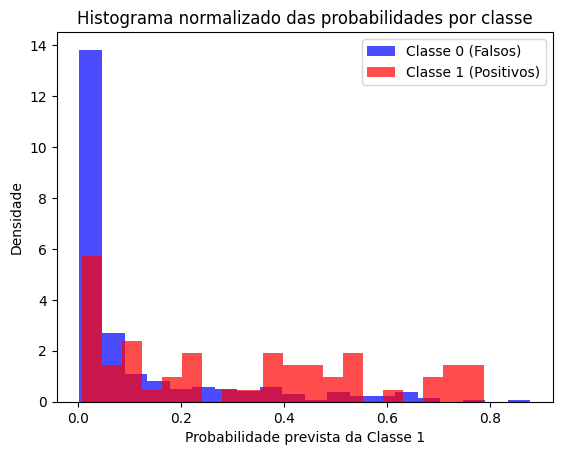

In [425]:

previsao = model.predict(X_test)
eficiencia = recall_score(Y_test,previsao,pos_label=1)
pureza = precision_score(Y_test, previsao, pos_label=1)

y_proba = model.predict_proba(X_test)[:, 1]
nome = True

plt.hist(y_proba[Y_test.ravel() == 0], bins=20, alpha=0.7, color="blue", label="Classe 0 (Falsos)", density=nome)

plt.hist(y_proba[Y_test.ravel() == 1], bins=20, alpha=0.7, color="red", label="Classe 1 (Positivos)", density=nome)

plt.xlabel("Probabilidade prevista da Classe 1")
plt.ylabel("Densidade")
plt.title("Histograma normalizado das probabilidades por classe")
plt.legend()
plt.show()